In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [2]:
import DataStore

ds = DataStore.DataStore("data", 5)

In [3]:
ds.trainData['A-3'].x[2056]

array([[0.11308108, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.3336605 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.3336605 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [4]:
ds.trainData['A-3'].y[2056]

array([0.3336605, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       ])

In [5]:
loaded_model = tf.keras.models.load_model('models/experimental/A-1.h5')

2022-09-16 13:36:35.956834: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
loaded_model.layers

In [7]:
ds.testData['A-1'].x[0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 0., 0.]])

In [8]:
ds.testData['A-1'].y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
preds = loaded_model.predict(ds.testData['A-2'].x)

248/248 [==============================] - 0s 2ms/step


In [33]:
preds

array([[[ 1.0002573e+00,  7.2802237e-04,  4.7445070e-04, ...,
          7.0562259e-05,  7.6727895e-04,  4.2236791e-04]],

       [[ 1.0116557e+00,  1.3819882e-01, -2.2831244e-02, ...,
         -3.8618496e-01,  4.0031530e-02, -4.5442497e-03]],

       [[ 1.0115415e+00,  1.3585907e-01, -2.2604376e-02, ...,
         -3.8386351e-01,  3.9588023e-02, -4.3518380e-03]],

       ...,

       [[ 1.0109632e+00,  1.4078371e-01, -1.8821664e-02, ...,
         -2.8975078e-01,  3.6277536e-02, -8.7991487e-03]],

       [[ 1.0002589e+00,  8.4965560e-04,  3.9768964e-04, ...,
         -1.1736295e-03,  8.3219056e-04,  4.7649242e-04]],

       [[ 1.0002420e+00,  5.2001863e-04,  4.8308025e-04, ...,
          7.9791680e-05,  7.3107419e-04,  4.5525661e-04]]], dtype=float32)

In [34]:
y = ds.testData['A-2'].y

In [35]:
from Utils import get_e, rmse, mae, classify_pl, make_discrete_lbls, vectorize_labels
import os



In [36]:
pls = classify_pl(y, preds, 100)

In [37]:
e = rmse(y, preds)

In [38]:
lbls = make_discrete_lbls(os.path.join("data", "labeled_anomalies.csv"))
lbls['A-2']

[(4450, 4560)]

In [39]:
pls = classify_pl(preds, y, 100)

In [40]:
lb = vectorize_labels(lbls['A-2'], preds.shape[0])

In [41]:
import matplotlib.pyplot as plt


In [42]:
e

0.6131101590138729

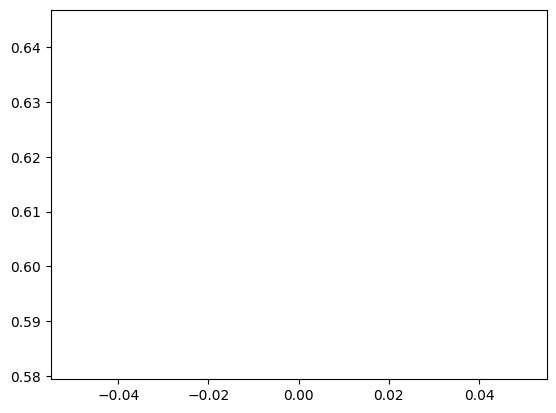

In [43]:
plt.plot(e)

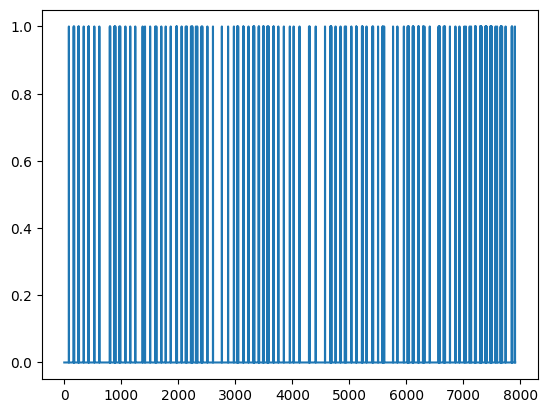

In [44]:
plt.plot(pls)

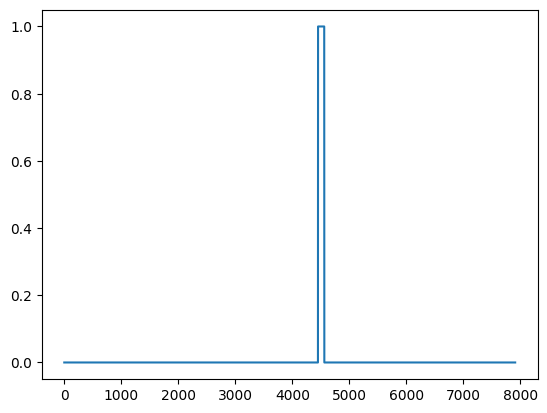

In [45]:
plt.plot(lb)

In [ ]:
pld.l.plot()

In [ ]:
tst = np.abs(ds.testData['A-1'].y[0] - preds[0])

In [ ]:
tst > .14146

In [ ]:
s = True*20

In [ ]:
s

In [ ]:
t = np.ones((100,1))*False

In [ ]:
t[-11:-1]

In [ ]:
for p in preds:
    print(p)